In [10]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


!pip install opencv-python

In [11]:
src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

In [12]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
#얼굴인식
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
#눈인식 라이브러리
if face_classifier.empty() or eye_classifier.empty():
    print('XML load failed!')
    sys.exit()

In [13]:
faces = face_classifier.detectMultiScale(src)

실행 속도를 증가하기 위해 얼궁의 반 위쪽부분만 추출하여 실행합니다.

In [14]:
for (x1, y1, w1, h1) in faces:
    cv2.rectangle(src, (x1, y1), (x1 + w1, y1 + h1), (255, 0, 255), 2)

    #얼굴에서 반 위쪽부분만 추출
    faceROI = src[y1:y1 + h1 // 2, x1:x1 + w1]
    
    #눈 학습 모델을 사용해 얼굴 위쪽 마스크에서 눈을 검출합니다.
    eyes = eye_classifier.detectMultiScale(faceROI)
    
    #눈 검출후 원 그리기.
    for (x2, y2, w2, h2) in eyes:
        center = (x2 + w2 // 2, y2 + h2 // 2)
        cv2.circle(faceROI, center, w2 // 2, (255, 0, 0), 2, cv2.LINE_AA)


((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x27937a01820>)

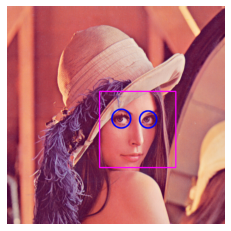

In [16]:
src=cv2.cvtColor(src,cv2.COLOR_RGB2BGR)
plt.axis('off'),plt.imshow(src)

In [17]:
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()
